In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
d = pd.read_csv(r'C:\Users\phani\OneDrive\Desktop\DDS\ML\notebooks\data\auto-mpg.csv')
label_col = 'mpg'
feature_cols = [c for c in d.columns if c != label_col]
X = d[feature_cols]
y = d[label_col]

In [8]:
lin = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

In [26]:
mse = list()

for i in range(10000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=.25, random_state=i)
    lin.fit(X_train, y_train)
    mse.append(mean_squared_error(y_test, lin.predict(X_test)))

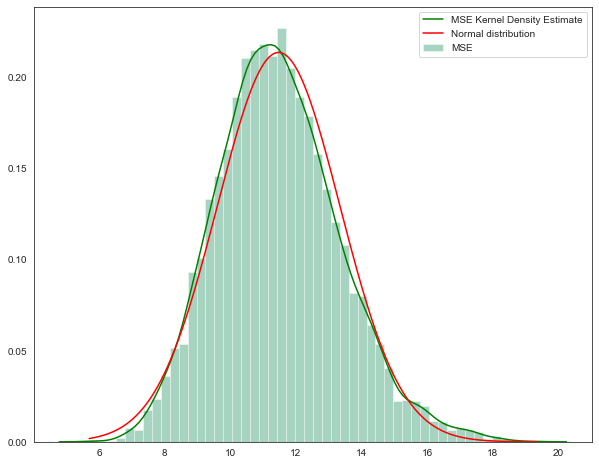

In [55]:
from scipy.stats import norm
nx = np.linspace(min(mse), max(mse), 1000)

fig, ax = plt.subplots(figsize=(10, 8))
sns.set_style('white')
sns.distplot(mse, ax=ax, label='MSE', kde=False, norm_hist=True)
sns.kdeplot(mse, ax=ax, label='MSE Kernel Density Estimate', color='green')
ax.plot(nx, norm.pdf(nx, np.mean(mse), np.std(mse)), color='red', label='Normal distribution');
ax.legend();

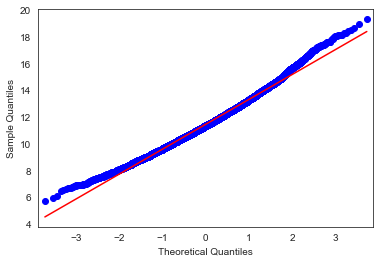

In [45]:
from statsmodels.graphics.gofplots import qqplot
import numpy as np

mse = np.array(mse)
qq = qqplot(mse, line='s')

In [46]:
from scipy.stats import normaltest

stat, pval = normaltest(mse)
if pval < 0.05:
    print(f"Rejected the null hypothesis. Looks like not gaussian (stat = {stat:.3f}, pval = {pval:.3f})")
else:
    print(f"Failed to reject the null hypothesis. Looks like gaussian (stat = {stat:.3f}, pval = {pval:.3f})")

Rejected the null hypothesis. Looks like not gaussian (stat = 272.208, pval = 0.000)
